In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from models import CNN
from sklearn import preprocessing

In [2]:
# The data, split between train and test sets:
(_, _), (X, y) = cifar10.load_data()
print(np.min(X), np.max(X))
X = X.astype(np.float32)

0 255


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [4]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
clf.fit(np.reshape(X_train, (X_train.shape[0], -1)), y_train.squeeze())

/home/thallessilva/anaconda3/envs/tf2.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
print("Train score:", clf.score(np.reshape(X_train,(X_train.shape[0], -1)), y_train),
      "Test score:", clf.score(np.reshape(X_test,(X_test.shape[0], -1)), y_test))

Train score: 0.4815 Test score: 0.388


## Self-Supervised pre-training

In [6]:
encoder = CNN(X.shape[1:])

_ = encoder(np.random.rand(1,32,32,3).astype(np.float32), head='f')
encoder.load_weights('encoder.h5')

In [7]:
X_train_repr, _ = encoder(tf.cast(X_train, tf.float32) / 255, head=tf.constant('f'), training=tf.constant(True))
X_test_repr, _ = encoder(tf.cast(X_test, tf.float32) / 255, head=tf.constant('f'), training=tf.constant(True))
print(X_train_repr.shape)
print(X_test_repr.shape)

(8000, 128)
(2000, 128)


In [8]:
scaler = preprocessing.StandardScaler().fit(X_train_repr)
X_train_repr = scaler.transform(X_train_repr)
X_test_repr = scaler.transform(X_test_repr)

In [9]:
clf = LogisticRegression(random_state=0, max_iter=400, solver='lbfgs', multi_class='auto')
clf.fit(X_train_repr, y_train.squeeze())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print("Train score:", clf.score(X_train_repr, y_train.squeeze()), 
      "Test score:", clf.score(X_test_repr, y_test.squeeze()))
# 0.48 0.4665
# 0.535625 0.4845

Train score: 0.535375 Test score: 0.485


In [11]:
X_train_repr[0]

array([ 0.24765692,  0.48807445,  0.80008323, -1.46848573, -1.65292221,
       -0.28791315, -2.22304205, -1.00856505,  0.09216471,  1.57575346,
        2.42312649,  0.85931254,  0.43564491,  1.08396145,  0.83162543,
        1.83376172,  0.58390826,  1.01017468,  0.87828961, -1.09968581,
       -1.32704817, -0.92708113,  0.35305252,  1.98763547,  0.19264504,
        0.49739264, -0.58671179,  0.89052145, -1.86946512, -1.63912472,
       -0.6520581 , -1.54943105,  1.26395828, -0.49712884,  0.3715303 ,
       -0.25748842,  0.96900548, -0.68331432,  0.60551037, -0.63490339,
       -1.89878219,  1.97336738,  0.64108109,  0.77657956,  1.29640802,
        0.77359414,  0.27850744,  1.39732481,  0.11255056,  0.35475747,
       -0.7517918 ,  0.36773391, -1.16205979,  1.65003101,  0.4108299 ,
        0.30765118, -1.09517514, -0.13851952,  0.68586   ,  1.61682975,
        1.02957501,  0.10707549, -0.40448586, -0.28925389,  1.4740915 ,
        2.52552509, -0.76132749, -0.14276601,  0.23660545, -0.07

In [12]:
X_test_repr[0]

array([ 0.83533231, -0.62874685, -1.73612786,  0.56982475,  0.46408554,
       -0.00393243, -0.44353533, -0.97161604,  0.6698375 , -0.11615772,
       -0.41558809, -0.04561542, -1.34159379,  0.83971546, -0.26731173,
       -0.14380815,  0.70098551,  0.62076779, -0.21610198, -1.72556252,
       -0.05454968,  0.38434535,  0.73152347, -0.50915712, -0.60751497,
       -0.31295509, -1.18616316,  1.29658752,  0.77081006,  0.01899596,
       -0.72931843,  0.01378072, -0.04822996, -0.65922778, -1.37032752,
       -1.04392254, -0.51888498,  0.00313381, -0.00562719, -0.60408604,
       -0.80961238,  0.10115419, -0.72532121,  0.48696138, -0.16029394,
        0.07995218,  1.25768891, -2.31524315,  0.31335911, -0.15823462,
       -1.00387482, -1.30940597,  0.83280196,  0.16688541, -1.88395379,
        0.03590128, -0.2333331 ,  1.07079794, -0.54597095, -1.53042527,
       -0.37795683,  0.01109873, -0.24566415, -1.42870517,  0.1076606 ,
       -0.83840028, -0.90897512, -0.33417022, -0.1043001 , -0.35

In [13]:
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
loss = cosine_loss([[0.0001, 1], [1., 1]], [[0.0002, 1], [0., 1]])

print('Loss: ', loss.numpy())  # Loss: 0.5

Loss:  -0.8535534


In [14]:
a = tf.convert_to_tensor([1,6,5], dtype=tf.int32)
b = tf.convert_to_tensor([4,3,2], dtype=tf.int32)
res = tf.sets.intersection(a[None,:],b[None,:])
print(tf.size(res))

tf.Tensor(0, shape=(), dtype=int32)


In [15]:
a = np.array([28.171087, 30.802778], dtype=np.float32)
b = np.array([2.2323670e-06, 2.1488113e-06], dtype=np.float32)

print(a / (a+b))

[0.99999994 0.99999994]


In [16]:
samples = tf.random.categorical(tf.math.log([[0.5, 0.5]]), 5)
samples

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[0, 1, 0, 0, 0]])>

In [17]:
shape = (10,8)

positive_indices = tf.constant([[1], [4]])
positive_indices_mask = tf.zeros_like(positive_indices.shape)

mask = tf.ones([shape[0]], dtype=tf.int32)
mask = tf.tensor_scatter_nd_update(mask, positive_indices, positive_indices_mask)
print(mask)

tf.Tensor([1 0 1 1 0 1 1 1 1 1], shape=(10,), dtype=int32)


In [18]:
p = tf.ones(shape[0])
p = p * tf.cast(mask, tf.float32)
p = p / tf.reduce_sum(p)
print(p)

candidate_negative_indices = tf.random.categorical(tf.math.log(tf.reshape(p, (1,-1))), 5000) # note log-prob
print(candidate_negative_indices)

tf.Tensor([0.125 0.    0.125 0.125 0.    0.125 0.125 0.125 0.125 0.125], shape=(10,), dtype=float32)
tf.Tensor([[8 8 9 ... 8 7 5]], shape=(1, 5000), dtype=int64)


(array([640.,   0., 625., 594.,   0., 630., 644., 610., 615., 642.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

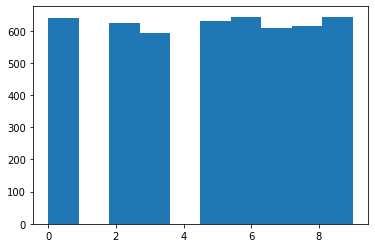

In [19]:
plt.hist(candidate_negative_indices)

In [20]:
# positive_indices = tf.constant([1,2], dtype=tf.int32)
# a = 

indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([0, 0, 0, 0])

tensor = tf.ones([8], dtype=tf.int32)
mask = tf.tensor_scatter_nd_update(tensor, indices, updates)
print(updated)

NameError: name 'updated' is not defined

In [ ]:
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
tensor = tf.ones([12], dtype=tf.int32)
updated = tf.tensor_scatter_nd_add(tensor, indices, updates)
print(updated)

In [ ]:
import tensorflow as tf

In [ ]:
BS=2
N_NEG=3
N_DIM=4

In [ ]:
vi = tf.ones((BS, N_DIM))

a = tf.ones([BS,N_NEG,N_DIM])
negatives = tf.random.uniform([BS,N_NEG,N_DIM])
negatives

In [ ]:
cosine_similarity = tf.keras.losses.CosineSimilarity(reduction=tf.losses.Reduction.NONE, axis=-1)

In [ ]:
negatives

In [ ]:
similatiry = []
for vi_prime in tf.transpose(negatives, (1,0,2)):
    vi_prime = tf.expand_dims(vi_prime, axis=1)
    
    negatives_ = tf.expand_dims(tf.reshape(negatives, (-1,N_DIM)), axis=0)
    
    print(vi_prime)
    print("---------------")
#     print(negatives_)
#     print("---------------")
    s = cosine_similarity(vi_prime, negatives_)
    similatiry.append(s)
    print(s)
    s = tf.reduce_sum(s, axis=1)
#     print(s)
    print("---------------")
    print("---------------")

#     break

In [ ]:
res = cosine_similarity(negatives, negatives)

In [ ]:
cosine_similarity([0.34904468, 0.73694515, 0.02537,    0.54320323], 
                  [0.4723971,  0.58122766, 0.878623,   0.18785727])

## MAPFN

In [ ]:
print(negatives.shape)

@tf.function
def func(vi_prime):
    vi_prime = tf.expand_dims(vi_prime, axis=1)
    similarity = cosine_similarity(vi_prime, negatives)
    return similarity


squares = tf.map_fn(func, tf.transpose(negatives, (1,0,2)), parallel_iterations=BS)

## UNPACK

In [ ]:
tf.unstack(tf.transpose(negatives, (1,0,2)))